In [167]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import psycopg2
import plotly.express as px


ipums = "//Users/timothycummins/Downloads/ipums_puma_2010"
ipum_df = gpd.read_file(ipums)
ipum_wa = ipum_df.loc[ipum_df['STATEFIP'] == '53']


DBNAME = "opportunity_youth"
conn = psycopg2.connect(dbname=DBNAME)
oypp = pd.read_sql("""SELECT DISTINCT(puma5ce) "PUMA", statefp, countyfp  FROM ct_puma_xwalk WHERE statefp = '53' and countyfp = '033' """, conn)

oypum = pd.merge(ipum_wa,oypp,how='right',on='PUMA')

oypum = oypum.dropna()
oypum.head()

puma_nums = ['11610', '11611', '11612', '11613', '11614', '11615']
oypum['skc'] = np.where(oypum['PUMA'].isin(puma_nums),'SOUTH KING COUNTY','THE REST OF\nKING COUNTY')

oypum['Name'] = oypum['Name'].map(lambda x: x.lstrip('King County  (Northwest)-- al)-- ').rstrip('PUMA (Northeast)'))
oypum['Name'][0] = 'Shoreline,\nKenmore,\nBothell'
oypum['Name'][1] = '\nBellevue'
oypum['Name'][2] = 'Renton,\nSkyway'
oypum['Name'][3] = 'Redmond,\nKirkland,\nInglewood'
oypum['Name'][4] = ''
oypum['Name'][5] = 'Capitol\nHill'
oypum['Name'][6] = 'Issaquah,\nMercer Island'
oypum['Name'][7] = 'Kent'
oypum['Name'][8] = 'Auburn'
oypum['Name'][9] = 'Maple Valley,\nCovington & Enumclaw'
oypum['Name'][10] = 'Seattle'
oypum['Name'][11] = 'Queen Anne'
oypum['Name'][12] = ''
oypum['Name'][13] = 'Burien,\nSeaTac,\nTukwila'
oypum['Name'][14] = 'Federal Way,\nDes Moines'
oypum['Name'][15] = 'Snoqualmie City,\nCottage Lake,\n Union Hill'

oypum.head(20)


<ipython-input-167-c93fbe47c17e>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-167-c93fbe47c17e>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-167-c93fbe47c17e>:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-167-c93fbe47c17e>:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

,GISMATCH,GISJOIN,GEOID,STATEFIP,State,PUMA,Name,geometry,statefp,countyfp,skc
0,5311606,G53011606,5311606,53,Washington,11606,"Shoreline,\nKenmore,\nBothell","MULTIPOLYGON (((-1957975.193 1416319.557, -195...",53,033,THE REST OF\nKING COUNTY
1,5311608,G53011608,5311608,53,Washington,11608,\nBellevue,"POLYGON ((-1957887.975 1404329.861, -1957903.8...",53,033,THE REST OF\nKING COUNTY
2,5311610,G53011610,5311610,53,Washington,11610,"Renton,\nSkyway","POLYGON ((-1955803.190 1386966.027, -1955824.1...",53,033,SOUTH KING COUNTY
3,5311607,G53011607,5311607,53,Washington,11607,"Redmond,\nKirkland,\nInglewood","POLYGON ((-1952839.291 1412380.172, -1952643.4...",53,033,THE REST OF\nKING COUNTY
4,5311602,G53011602,5311602,53,Washington,11602,,"POLYGON ((-1960613.321 1414852.672, -1960610.3...",53,033,THE REST OF\nKING COUNTY
5,5311604,G53011604,5311604,53,Washington,11604,Capitol\nHill,"POLYGON ((-1963920.334 1390069.184, -1963980.0...",53,033,THE REST OF\nKING COUNTY
6,5311609,G53011609,5311609,53,Washington,11609,"Issaquah,\nMercer Island","MULTIPOLYGON (((-1962059.734 1399443.982, -196...",53,033,THE REST OF\nKING COUNTY
7,5311613,G53011613,5311613,53,Washington,11613,Kent,"POLYGON ((-1964607.872 1382415.161, -1964615.5...",53,033,SOUTH KING COUNTY
8,5311614,G53011614,5311614,53,Washington,11614,Auburn,"POLYGON ((-1962306.184 1370551.322, -1962307.7...",53,033,SOUTH KING COUNTY
9,5311615,G53011615,5311615,53,Washington,11615,"Maple Valley,\nCovington & Enumclaw","POLYGON ((-1940930.854 1384594.946, -1940902.4...",53,033,SOUTH KING COUNTY


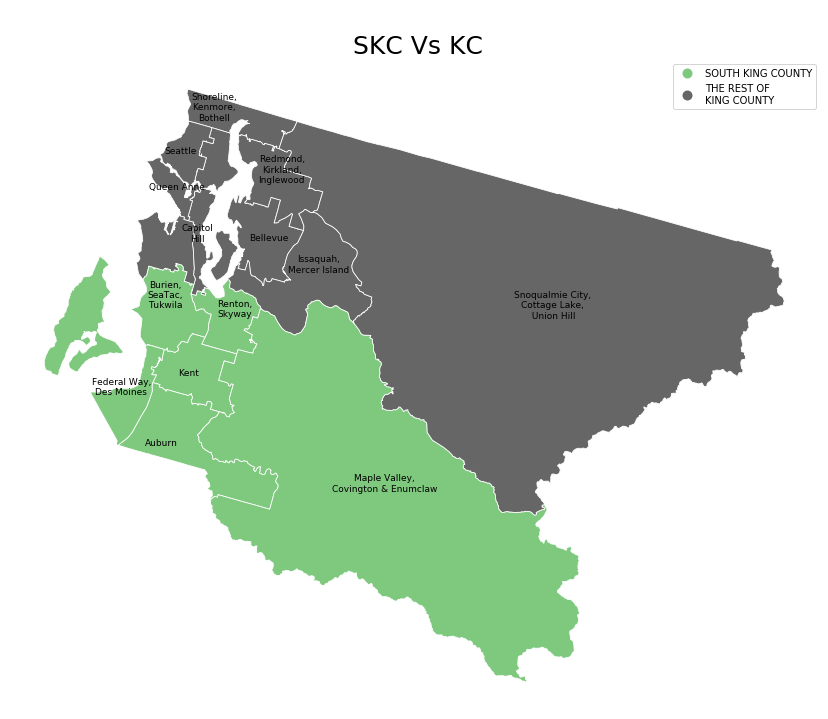

In [168]:

plt.rcParams['figure.figsize'] = [8, 6] #height, width

vmin, vmax = 0, 1

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(16,12))

# remove the axis
ax.axis('off')

# add a title and annotation
ax.set_title('\n SKC Vs KC', fontdict={'fontsize': '25', 'fontweight' : '3'})
# ax.legend(oypum['skc'],('SKC','KC'))

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([])

# cbar = fig.colorbar(sm)

# create map
oypum.plot(column=(oypum['skc']), cmap='Accent', linewidth=0.8, ax=ax, edgecolor='1', legend=True)

# Add Labels
oypum['coords'] = oypum['geometry'].apply(lambda x: x.representative_point().coords[:])
oypum['coords'] = [coords[0] for coords in oypum['coords']]

# Display names 
for idx, row in oypum.iterrows():
    plt.annotate(s=row['Name'], xy=row['coords'],horizontalalignment='center',size='9')
